In [30]:
import pandas as pd
import numpy as np
from numpy.random import randint
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import time
from scipy.optimize import curve_fit

In [19]:
data = pd.read_csv('2021-05-25_trends.csv')
data.head()

,Date,Location,ShortName,LongName,Administered_Daily,Administered_Cumulative,Administered_7_Day_Rolling_Average,Admin_Dose_1_Daily,Admin_Dose_1_Cumulative,Admin_Dose_1_Day_Rolling_Average,Admin_Dose_2_Daily,Admin_Dose_2_Cumulative,Admin_Dose_2_Day_Rolling_Average,Series_Complete_Daily,Series_Complete_Cumulative,Series_Complete_Day_Rolling_Average,date_type,Administered_daily_change_report,Administered_daily_change_report_7dayroll
0,2020-12-13,US,USA,United States,12872.0,12872.0,12872.0,11348.0,11348.0,11348.0,1355.0,1355.0,1355.0,1463.0,1463.0,1463.0,Admin,NaN,NaN
1,2020-12-14,US,USA,United States,3853.0,16725.0,8362.0,3725.0,15073.0,7537.0,5.0,1360.0,680.0,30.0,1493.0,746.0,Admin,NaN,NaN
2,2020-12-15,US,USA,United States,49564.0,66289.0,22096.0,46093.0,61166.0,20389.0,27.0,1387.0,462.0,60.0,1553.0,517.0,Admin,NaN,NaN
3,2020-12-16,US,USA,United States,160221.0,226510.0,56627.0,153277.0,214443.0,53611.0,208.0,1595.0,399.0,244.0,1797.0,449.0,Admin,NaN,NaN
4,2020-12-17,US,USA,United States,273269.0,499779.0,99955.0,262051.0,476494.0,95299.0,515.0,2110.0,422.0,544.0,2341.0,468.0,Admin,NaN,NaN


In [20]:
# Pre-processing the data
data = data[data['Location']=='US']
data = data[data.notna()]
data.head()

,Date,Location,ShortName,LongName,Administered_Daily,Administered_Cumulative,Administered_7_Day_Rolling_Average,Admin_Dose_1_Daily,Admin_Dose_1_Cumulative,Admin_Dose_1_Day_Rolling_Average,Admin_Dose_2_Daily,Admin_Dose_2_Cumulative,Admin_Dose_2_Day_Rolling_Average,Series_Complete_Daily,Series_Complete_Cumulative,Series_Complete_Day_Rolling_Average,date_type,Administered_daily_change_report,Administered_daily_change_report_7dayroll
0,2020-12-13,US,USA,United States,12872.0,12872.0,12872.0,11348.0,11348.0,11348.0,1355.0,1355.0,1355.0,1463.0,1463.0,1463.0,Admin,NaN,NaN
1,2020-12-14,US,USA,United States,3853.0,16725.0,8362.0,3725.0,15073.0,7537.0,5.0,1360.0,680.0,30.0,1493.0,746.0,Admin,NaN,NaN
2,2020-12-15,US,USA,United States,49564.0,66289.0,22096.0,46093.0,61166.0,20389.0,27.0,1387.0,462.0,60.0,1553.0,517.0,Admin,NaN,NaN
3,2020-12-16,US,USA,United States,160221.0,226510.0,56627.0,153277.0,214443.0,53611.0,208.0,1595.0,399.0,244.0,1797.0,449.0,Admin,NaN,NaN
4,2020-12-17,US,USA,United States,273269.0,499779.0,99955.0,262051.0,476494.0,95299.0,515.0,2110.0,422.0,544.0,2341.0,468.0,Admin,NaN,NaN


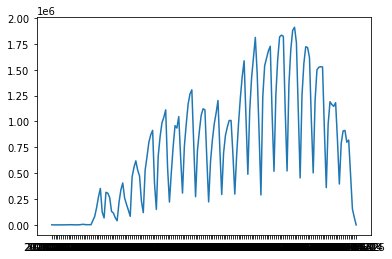

In [25]:
plt.plot(data['Date'],data['Admin_Dose_2_Daily'])

In [16]:
data[data['Date']=='2020-12-13']

,Date,Location,ShortName,LongName,Administered_Daily,Administered_Cumulative,Administered_7_Day_Rolling_Average,Admin_Dose_1_Daily,Admin_Dose_1_Cumulative,Admin_Dose_1_Day_Rolling_Average,Admin_Dose_2_Daily,Admin_Dose_2_Cumulative,Admin_Dose_2_Day_Rolling_Average,Series_Complete_Daily,Series_Complete_Cumulative,Series_Complete_Day_Rolling_Average,date_type,Administered_daily_change_report,Administered_daily_change_report_7dayroll
0,2020-12-13,US,USA,United States,12872.0,12872.0,12872.0,11348.0,11348.0,11348.0,1355.0,1355.0,1355.0,1463.0,1463.0,1463.0,Admin,NaN,NaN
164,2020-12-13,US,USA,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Report,0.0,0.0
328,2020-12-13,LTC,LTC,Long Term Care,229.0,229.0,229.0,229.0,229.0,229.0,0.0,0.0,0.0,0.0,0.0,0.0,Admin,NaN,NaN


In [31]:
from scipy.stats import norm

In [33]:
mean,std=norm.fit(data['Administered_Daily'])

RuntimeError: The data contains non-finite values.

In [61]:
select_data = data[['Date', 'Administered_Daily']]
filtered_data = select_data.dropna()
filtered_data = filtered_data.set_index('Date')
filtered_data

,Administered_Daily
Date,
2020-12-13,12872.0
2020-12-14,3853.0
2020-12-15,49564.0
2020-12-16,160221.0
2020-12-17,273269.0
...,...
2021-05-21,1578187.0
2021-05-22,1042894.0
2021-05-23,311779.0


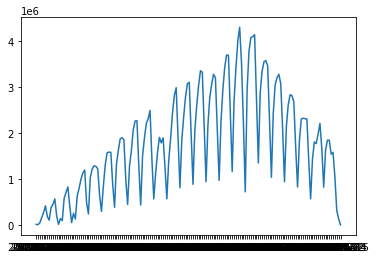

In [48]:
plt.plot(filtered_data['Date'],filtered_data['Administered_Daily'])

In [58]:
from statsmodels.tsa.arima.model import ARIMA

In [62]:
model = ARIMA(filtered_data, order=(5,1,0))

C:\Users\miran\Anaconda3\envs\yyg_simulator\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\miran\Anaconda3\envs\yyg_simulator\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\miran\Anaconda3\envs\yyg_simulator\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


In [63]:
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:     Administered_Daily   No. Observations:                  164
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -2342.446
Date:                Sun, 30 May 2021   AIC                           4696.892
Time:                        19:04:43   BIC                           4715.455
Sample:                    12-13-2020   HQIC                          4704.429
                         - 05-25-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1750      0.059     -2.980      0.003      -0.290      -0.060
ar.L2         -0.5545      0.060     -9.192      0.000      -0.673      -0.436
ar.L3         -0.4334      0.084     -5.138      0.0

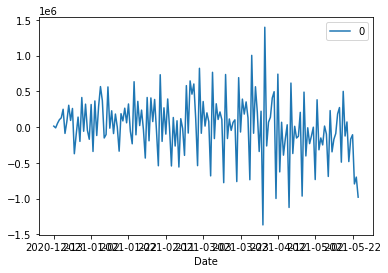

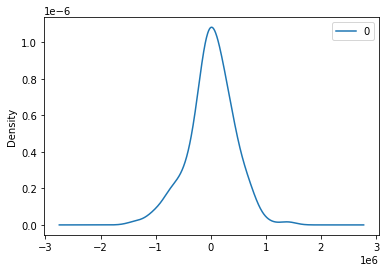

                  0
count  1.640000e+02
mean   1.305622e+04
std    4.177369e+05
min   -1.367650e+06
25%   -1.688030e+05
50%    1.722200e+04
75%    2.650624e+05
max    1.394976e+06


In [64]:
# line plot of residuals
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
# density plot of residuals
residuals.plot(kind='kde')
plt.show()
# summary stats of residuals
print(residuals.describe())

In [65]:
model_fit.forecast()

2021-05-26    606591.987323
Freq: D, dtype: float64

In [70]:
model_fit.forecast()

2021-05-26    606591.987323
Freq: D, dtype: float64

In [110]:
preds = model_fit.predict(start='2020-12-13', end='2021-06-30')

In [79]:
preds[1]

15168.537644810895

In [111]:
preds.head()

2020-12-13         0.000000
2020-12-14     15168.537645
2020-12-15     -3301.920083
2020-12-16     57675.232714
2020-12-17    144243.254939
Freq: D, Name: predicted_mean, dtype: float64

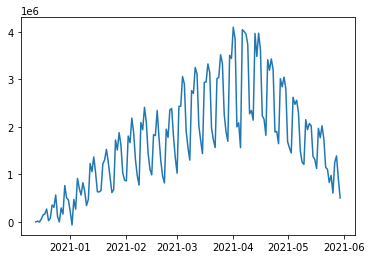

In [86]:
plt.plot(preds)
# plt.plot(filtered_data.index,filtered_data['Administered_Daily'])

In [83]:
filtered_data

,Administered_Daily
Date,
2020-12-13,12872.0
2020-12-14,3853.0
2020-12-15,49564.0
2020-12-16,160221.0
2020-12-17,273269.0
...,...
2021-05-21,1578187.0
2021-05-22,1042894.0
2021-05-23,311779.0


In [112]:
preds_df = pd.DataFrame(preds)

In [108]:
preds_df

,predicted_mean
2020-12-13,0.000000
2020-12-14,15168.537645
2020-12-15,-3301.920083
2020-12-16,57675.232714
2020-12-17,144243.254939
...,...
2021-08-26,710540.710953
2021-08-27,713393.330196
2021-08-28,702061.465924
2021-08-29,685844.033326


In [94]:
filtered_data.index

Index(['2020-12-13', '2020-12-14', '2020-12-15', '2020-12-16', '2020-12-17',
       '2020-12-18', '2020-12-19', '2020-12-20', '2020-12-21', '2020-12-22',
       ...
       '2021-05-16', '2021-05-17', '2021-05-18', '2021-05-19', '2021-05-20',
       '2021-05-21', '2021-05-22', '2021-05-23', '2021-05-24', '2021-05-25'],
      dtype='object', name='Date', length=164)

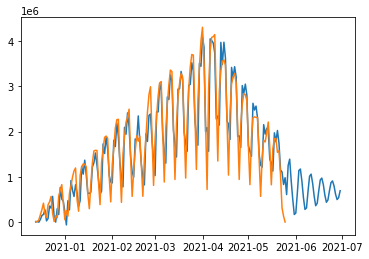

In [113]:
plt.plot(preds_df.index,preds_df['predicted_mean'])
plt.plot(new_df.index,new_df['Administered_Daily'])

In [99]:
new_df = filtered_data.copy()

In [102]:
new_df.index = pd.to_datetime(new_df.index)

In [104]:
new_df.index

DatetimeIndex(['2020-12-13', '2020-12-14', '2020-12-15', '2020-12-16',
               '2020-12-17', '2020-12-18', '2020-12-19', '2020-12-20',
               '2020-12-21', '2020-12-22',
               ...
               '2021-05-16', '2021-05-17', '2021-05-18', '2021-05-19',
               '2021-05-20', '2021-05-21', '2021-05-22', '2021-05-23',
               '2021-05-24', '2021-05-25'],
              dtype='datetime64[ns]', name='Date', length=164, freq=None)